Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [81]:
import pandas as pd
import numpy as np

In [82]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv");

In [83]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [84]:
df.shape

(4340, 8)

In [85]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [86]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [87]:
len(df['name'].unique())

1491

In [88]:
split_data=df['name'].str.split(' ')
data = split_data.to_list()

In [89]:
names = ["Car", "Name",'','','','','','','','']

In [90]:
new_df = pd.DataFrame(data, columns=names)

In [91]:
new_df[['Car','Name']]

,Capital,State
0,Maruti,800
1,Maruti,Wagon
2,Hyundai,Verna
3,Datsun,RediGO
4,Honda,Amaze
...,...,...
4335,Hyundai,i20
4336,Hyundai,i20
4337,Maruti,800
4338,Hyundai,Creta


In [92]:
df1 = new_df['Car'].map(str) + new_df['Name'].map(str)

In [93]:
df=pd.concat([df,df1],axis=1)

In [94]:
df=df.rename({0:'Model'},axis=1)

In [96]:
data=df.drop('name',axis=1)

In [97]:
top_10=[x for x in data['Model'].value_counts().sort_values(ascending=False).head(10).index ]

In [98]:
data['Model'].value_counts().sort_values(ascending=False).head(10)

MarutiSwift      320
MarutiAlto       258
MarutiWagon      164
Hyundaii20       132
HyundaiVerna     129
HyundaiGrand     112
HyundaiSantro    111
ToyotaInnova     102
HyundaiEON       100
TataIndica        98
Name: Model, dtype: int64

In [99]:
for label in top_10:
    data[label]=np.where(data['Model']==label,1,0)

In [100]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti800,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,MarutiWagon,0,0,1,0,0,0,0,0,0,0
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,HyundaiVerna,0,0,0,0,1,0,0,0,0,0
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,DatsunRediGO,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,HondaAmaze,0,0,0,0,0,0,0,0,0,0


In [102]:
df=data.copy()

In [103]:
df.shape

(4340, 18)

In [104]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [105]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [106]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Model            0
MarutiSwift      0
MarutiAlto       0
MarutiWagon      0
Hyundaii20       0
HyundaiVerna     0
HyundaiGrand     0
HyundaiSantro    0
ToyotaInnova     0
HyundaiEON       0
TataIndica       0
dtype: int64

In [107]:
df.describe()

,year,selling_price,km_driven,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.073733,0.059447,0.037788,0.030415,0.029724,0.025806,0.025576,0.023502,0.023041,0.022581
std,4.215344,5.785487e+05,46644.102194,0.261366,0.236487,0.190705,0.171745,0.169843,0.158576,0.157885,0.151510,0.150053,0.148579
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
df.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
Model            object
MarutiSwift       int32
MarutiAlto        int32
MarutiWagon       int32
Hyundaii20        int32
HyundaiVerna      int32
HyundaiGrand      int32
HyundaiSantro     int32
ToyotaInnova      int32
HyundaiEON        int32
TataIndica        int32
dtype: object

In [109]:
df['NoOfYear']=2020-df['year']

In [110]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Model', 'MarutiSwift', 'MarutiAlto',
       'MarutiWagon', 'Hyundaii20', 'HyundaiVerna', 'HyundaiGrand',
       'HyundaiSantro', 'ToyotaInnova', 'HyundaiEON', 'TataIndica',
       'NoOfYear'],
      dtype='object')

In [200]:
data=df.copy()

In [201]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica,NoOfYear
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti800,0,0,0,0,0,0,0,0,0,0,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,MarutiWagon,0,0,1,0,0,0,0,0,0,0,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,HyundaiVerna,0,0,0,0,1,0,0,0,0,0,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,DatsunRediGO,0,0,0,0,0,0,0,0,0,0,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,HondaAmaze,0,0,0,0,0,0,0,0,0,0,6


In [202]:
data.drop('year',axis=1,inplace=True)

In [203]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica,NoOfYear
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti800,0,0,0,0,0,0,0,0,0,0,13
1,135000,50000,Petrol,Individual,Manual,First Owner,MarutiWagon,0,0,1,0,0,0,0,0,0,0,13
2,600000,100000,Diesel,Individual,Manual,First Owner,HyundaiVerna,0,0,0,0,1,0,0,0,0,0,8
3,250000,46000,Petrol,Individual,Manual,First Owner,DatsunRediGO,0,0,0,0,0,0,0,0,0,0,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,HondaAmaze,0,0,0,0,0,0,0,0,0,0,6


In [204]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [205]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [206]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [207]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [208]:
data['owner'].replace('First Owner',1,inplace=True)
data['owner'].replace('Second Owner',2,inplace=True)
data['owner'].replace('Third Owner',3,inplace=True)
data['owner'].replace('Fourth & Above Owner',4,inplace=True)
data['owner'].replace('Test Drive Car',0,inplace=True)
    


In [209]:
df1=pd.get_dummies(df['seller_type'],drop_first=True)

In [210]:
df2=pd.get_dummies(df['fuel'],drop_first=True)

In [211]:
df3=pd.get_dummies(df['transmission'],drop_first=True)

In [212]:
data=pd.concat([data,df1,df2,df3],axis=1)

In [213]:
data=data.drop(['fuel','seller_type','transmission'],axis=1)

In [214]:
import numpy as np
data['km_driven']=np.log(data['km_driven'])

In [215]:
data.head()


,selling_price,km_driven,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,...,HyundaiEON,TataIndica,NoOfYear,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual
0,60000,11.156251,1,Maruti800,0,0,0,0,0,0,...,0,0,13,1,0,0,0,0,1,1
1,135000,10.819778,1,MarutiWagon,0,0,1,0,0,0,...,0,0,13,1,0,0,0,0,1,1
2,600000,11.512925,1,HyundaiVerna,0,0,0,0,1,0,...,0,0,8,1,0,1,0,0,0,1
3,250000,10.736397,1,DatsunRediGO,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,1,1
4,450000,11.856515,2,HondaAmaze,0,0,0,0,0,0,...,0,0,6,1,0,1,0,0,0,1


In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

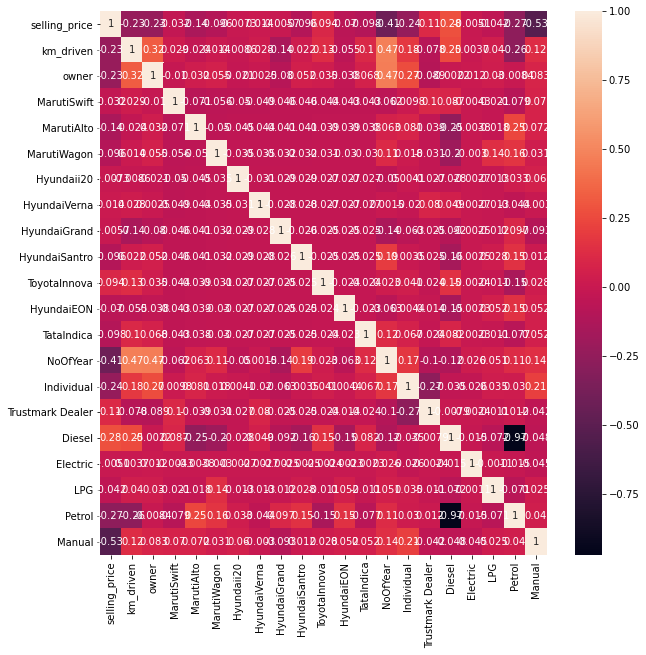

In [217]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [218]:
X=data.drop('selling_price',axis=1)
y=data['selling_price']

In [219]:
X.head()

,km_driven,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,...,HyundaiEON,TataIndica,NoOfYear,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual
0,11.156251,1,Maruti800,0,0,0,0,0,0,0,...,0,0,13,1,0,0,0,0,1,1
1,10.819778,1,MarutiWagon,0,0,1,0,0,0,0,...,0,0,13,1,0,0,0,0,1,1
2,11.512925,1,HyundaiVerna,0,0,0,0,1,0,0,...,0,0,8,1,0,1,0,0,0,1
3,10.736397,1,DatsunRediGO,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,1,1
4,11.856515,2,HondaAmaze,0,0,0,0,0,0,0,...,0,0,6,1,0,1,0,0,0,1


In [220]:
X[X['Manual']==1]

,km_driven,owner,Model,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,...,HyundaiEON,TataIndica,NoOfYear,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual
0,11.156251,1,Maruti800,0,0,0,0,0,0,0,...,0,0,13,1,0,0,0,0,1,1
1,10.819778,1,MarutiWagon,0,0,1,0,0,0,0,...,0,0,13,1,0,0,0,0,1,1
2,11.512925,1,HyundaiVerna,0,0,0,0,1,0,0,...,0,0,8,1,0,1,0,0,0,1
3,10.736397,1,DatsunRediGO,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,1,1
4,11.856515,2,HondaAmaze,0,0,0,0,0,0,0,...,0,0,6,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,11.289782,2,Hyundaii20,0,0,0,1,0,0,0,...,0,0,6,1,0,1,0,0,0,1
4336,11.289782,2,Hyundaii20,0,0,0,1,0,0,0,...,0,0,6,1,0,1,0,0,0,1
4337,11.326596,2,Maruti800,0,0,0,0,0,0,0,...,0,0,11,1,0,0,0,0,1,1
4338,11.407565,1,HyundaiCreta,0,0,0,0,0,0,0,...,0,0,4,1,0,1,0,0,0,1


In [221]:
X=X.drop('Model',axis=1)

In [222]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [223]:
import numpy as np
print(np.round(model.feature_importances_,3))

[0.223 0.027 0.008 0.005 0.002 0.002 0.008 0.004 0.001 0.013 0.002 0.003
 0.238 0.041 0.008 0.127 0.    0.    0.    0.288]


<AxesSubplot:>

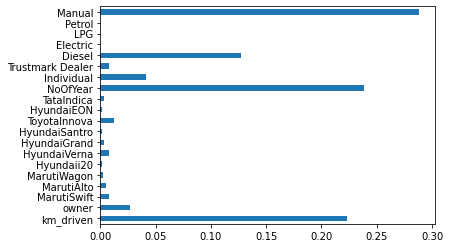

In [224]:
pd.Series(model.feature_importances_,index=X.columns).plot(kind='barh')

In [225]:
X.drop(['LPG','Electric'],axis=1,inplace=True)

In [226]:
X.head()

,km_driven,owner,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica,NoOfYear,Individual,Trustmark Dealer,Diesel,Petrol,Manual
0,11.156251,1,0,0,0,0,0,0,0,0,0,0,13,1,0,0,1,1
1,10.819778,1,0,0,1,0,0,0,0,0,0,0,13,1,0,0,1,1
2,11.512925,1,0,0,0,0,1,0,0,0,0,0,8,1,0,1,0,1
3,10.736397,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1
4,11.856515,2,0,0,0,0,0,0,0,0,0,0,6,1,0,1,0,1


In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [229]:
X_train.shape

(3472, 18)

In [230]:
X_test.shape

(868, 18)

In [231]:
y_test.shape

(868,)

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
from sklearn.model_selection import RandomizedSearchCV

In [234]:
rf=RandomForestRegressor()

In [235]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [236]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [237]:
rf = RandomForestRegressor()

In [238]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [239]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [240]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [241]:
rf_random.best_score_

-96475795036.789

In [242]:
predictions=rf_random.predict(X_test)

C:\Users\vhshe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

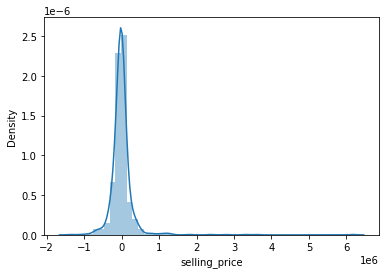

In [243]:
sns.distplot(y_test-predictions)

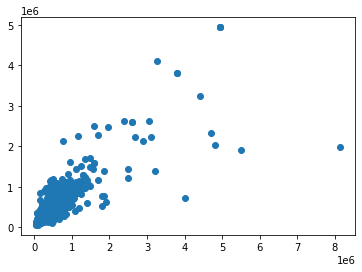

In [244]:
plt.scatter(y_test,predictions)

In [245]:
from sklearn import metrics

In [246]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 149703.11115501917
MSE: 138679454226.1008
RMSE: 372396.90415751416


In [247]:
import pickle

In [248]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model_1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [249]:
file = open("random_forest_regression_model_1.pkl",'rb')
object_file = pickle.load(file)

In [250]:
object_file.predict(X_test)

array([ 294815.89467376,  725602.05562782,  342623.25371032,
        144174.56533333,  308689.77717778,  593004.76933333,
        341870.768     ,  212871.66666667,  153833.72648333,
        317753.1475    ,  459222.498     , 1391591.46031746,
        690203.        ,  345470.63095238,  520005.        ,
        230274.995     ,  625000.        ,  203593.11318465,
       1012405.        ,  132674.41170588,  356852.59468003,
        556708.06742857, 1437794.        ,  242575.95028571,
        535554.47892169,  192347.87788095,   86812.49988889,
        256066.23276723,  463192.02140873,   76867.219     ,
        266638.38485714,  569680.59815873,  566702.86307937,
        116415.35614286,  108967.54290079,  356314.29084217,
        992149.26190476,  223316.43947619,  111390.69877784,
        352616.61213333,  116503.0912381 ,  119474.319     ,
        281387.40374849,  183013.66809579,  490171.01970996,
        165523.47619048,  308302.70980405,  385380.71428571,
        536063.10332474,

In [251]:
X_test

,km_driven,owner,MarutiSwift,MarutiAlto,MarutiWagon,Hyundaii20,HyundaiVerna,HyundaiGrand,HyundaiSantro,ToyotaInnova,HyundaiEON,TataIndica,NoOfYear,Individual,Trustmark Dealer,Diesel,Petrol,Manual
1449,11.156251,1,0,0,0,0,0,0,0,0,0,0,8,1,0,1,0,1
1701,9.903488,1,1,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1
2500,10.126631,1,0,0,0,0,0,0,0,0,0,0,8,1,0,1,0,1
438,10.951420,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,1,1
3053,9.903488,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,11.002100,1,0,0,0,0,0,0,0,0,0,0,10,1,0,0,1,1
1672,11.918391,2,0,0,0,0,0,0,0,0,0,0,15,1,0,1,0,1
2651,11.407565,3,0,1,0,0,0,0,0,0,0,0,14,1,0,0,1,1
4041,10.933107,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,1


In [252]:
X_test.columns

Index(['km_driven', 'owner', 'MarutiSwift', 'MarutiAlto', 'MarutiWagon',
       'Hyundaii20', 'HyundaiVerna', 'HyundaiGrand', 'HyundaiSantro',
       'ToyotaInnova', 'HyundaiEON', 'TataIndica', 'NoOfYear', 'Individual',
       'Trustmark Dealer', 'Diesel', 'Petrol', 'Manual'],
      dtype='object')